## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.12.23
- 성명 :
- 점수 :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cakd8/강의/dataset/data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
# A.
data = df.mathematics.describe()
iqr = data['75%'] - data['25%']
r = data['max'] - data['min']
v = data['std']**2
f = df.mathematics.mode()
print(data,'\n','범위:',r,'\n','최빈값:',f.values,'\n', '분산:', v,'\n','IQR:', iqr)

count    50.000000
mean     78.880000
std       8.414371
min      57.000000
25%      76.000000
50%      80.000000
75%      84.000000
max      94.000000
Name: mathematics, dtype: float64 
 범위: 37.0 
 최빈값: [77 82 84] 
 분산: 70.80163265306125 
 IQR: 8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [4]:
score = df.english
type(score)

pandas.core.series.Series

In [5]:
# A.
z = (score - np.mean(score)) / np.std(score)
z.values[:5]

array([-1.68843012,  1.09469645, -0.24532745, -1.79150888, -0.14224869])

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

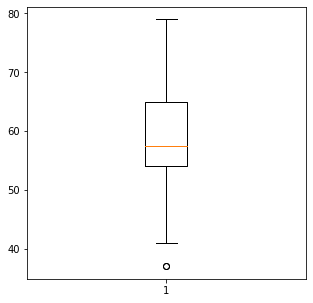

In [6]:
# A : 이상치 탐지를 위한 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.boxplot(score)
plt.show()

In [7]:
# A.이상치 및 인덱스 출력
s = score.describe()
print(s,'\n')
iqr = s['75%'] - s['25%']
print('IQR:',iqr,'\n')
lwhisker_chk = s['25%'] - 1.5 * iqr
print('lwhisker_chk:', lwhisker_chk,'\n')
lwhisker = score[score > lwhisker_chk].min()
print('lwhisker:',lwhisker,'\n')
print('이상치:',score[score < lwhisker].values[0],'\n')
# 이상치 인덱스 확인
idx = score[score < lwhisker].index
print('이상치 인덱스:', idx)

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64 

IQR: 11.0 

lwhisker_chk: 37.5 

lwhisker: 41 

이상치: 37 

이상치 인덱스: Int64Index([20, 35], dtype='int64', name='student number')


In [8]:
# A. 이상치 제거
rscore = score.drop(idx)

rscore.describe()

count    48.000000
mean     59.270833
std       8.936513
min      41.000000
25%      54.000000
50%      59.500000
75%      65.250000
max      79.000000
Name: english, dtype: float64

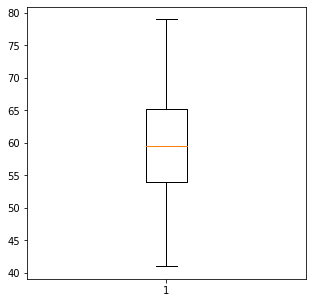

In [9]:
# A. 이상치 제거 확인
plt.figure(figsize=(5,5))
plt.boxplot(rscore)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cakd8/강의/dataset/data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [11]:
# A.
en_scores = scores_df.english
ma_scores = scores_df.mathematics
np.cov(en_scores,ma_scores)[0,1].round(2)

69.78

In [12]:
# A.
np.corrcoef(en_scores, ma_scores)[0,1].round(2)

0.82

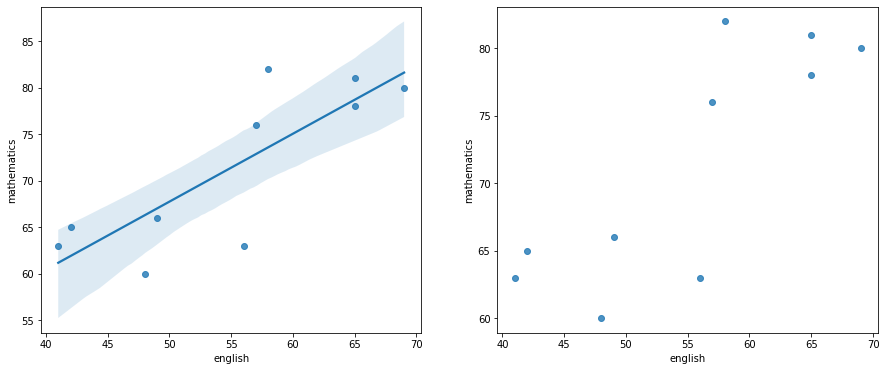

In [13]:
# A.
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,6),sharex=True)
sns.regplot(ax=axes[0], x=scores_df.english,y=scores_df.mathematics)
sns.regplot(ax=axes[1], x=scores_df.english,y=scores_df.mathematics,fit_reg=False )
plt.show()

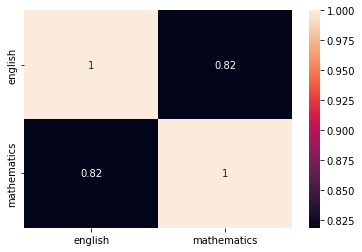

In [14]:
# A.
sns.heatmap(scores_df[['english','mathematics']].corr(),annot=True)

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [15]:
df = pd.read_csv('/content/drive/MyDrive/cakd8/강의/dataset/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

Text(0, 0.5, 'relative frequency')

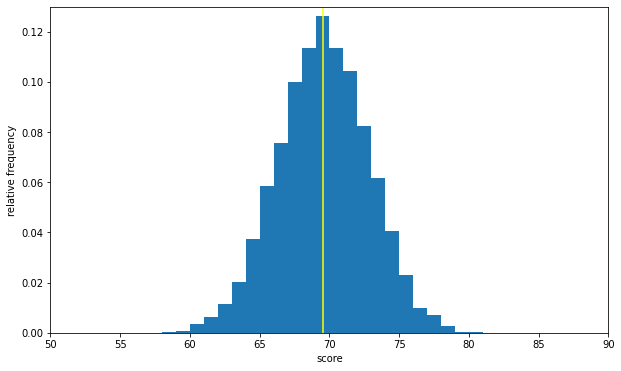

In [16]:
# A.
import matplotlib.pyplot as plt

sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

plt.figure(figsize=(10, 6))

plt.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores), 0, 1, 'yellow')
plt.axis([50, 90, 0, 0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')

Q6. 다음을 수행하세요
- 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 
- 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

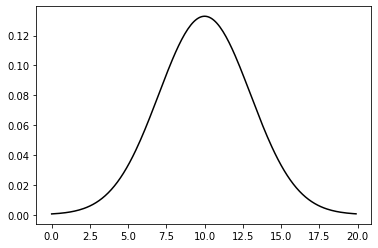

In [17]:
# A.
import matplotlib.pyplot as plt
from scipy import stats, integrate
x_plot = np.arange(0,20,0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot,loc=10,scale=3), color='black')

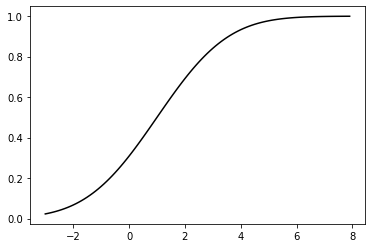

In [18]:
# A.
import matplotlib.pyplot as plt
x_plot = np.arange(-3,8,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot,loc=1,scale=2), color='black')

Q7. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [20]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("/content/drive/MyDrive/cakd8/강의/dataset/dataset/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [21]:
# A. df2의 species의 A, B를 C,D로 변경
df1 = pd.read_csv("/content/drive/MyDrive/cakd8/강의/dataset/dataset/5_2_fm.csv")
df2 = df1.copy()
df2.species = list('CCCDDD')
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [22]:
# A. df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
import pandas as pd
import numpy as np

def change(a, b):
    if a == 'C':
        return b*2
    else:
        return b*3    

df2['len'] = df2.apply(lambda x:change(x['species'],x['length']),axis=1)
df2.length = df2.len
df2.drop('len',axis=1,inplace=True)
df2
df = pd.concat([df1,df2])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,C,4
7,C,6
8,C,8
9,D,18


In [23]:
# A. df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출
df.groupby('species').describe()

length                                         
         count  mean  std   min   25%   50%   75%   max
species                                                
A          3.0   3.0  1.0   2.0   2.5   3.0   3.5   4.0
B          3.0   8.0  2.0   6.0   7.0   8.0   9.0  10.0
C          3.0   6.0  2.0   4.0   5.0   6.0   7.0   8.0
D          3.0  24.0  6.0  18.0  21.0  24.0  27.0  30.0

Q8. "5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [24]:
import pandas as pd
shoes = pd.read_csv("/content/drive/MyDrive/cakd8/강의/dataset/dataset/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [25]:
# A. 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요.
df = pd.concat([shoes,shoes1],ignore_index=True)
df    

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,tokyo,blue,10
5,tokyo,red,15
6,osaka,blue,13
7,osaka,red,9


In [26]:
# A. 피봇을 이용해서 교차분석표를 만드세요
cross = pd.pivot_table(data = df, values='sales',aggfunc='sum', index= 'store', columns = 'color')
cross

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [27]:
# A. 독립성 검정
# p값이 0.05보다 크므로 "매장에 따라 신발색이 다르다"는 가설은 유의미하지 않다
import scipy as sp
from scipy import stats
sp.stats.chi2_contingency(cross, correction=False)

(3.413537549407115, 0.06466368573255789, 1, array([[21.53191489, 22.46808511],
        [24.46808511, 25.53191489]]))

Q9. 'titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [28]:
titanic = pd.read_csv('/content/drive/MyDrive/cakd8/강의/dataset/dataset/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


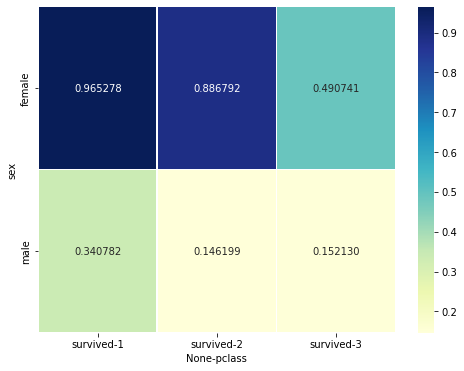

In [29]:
# A.
import seaborn as sns
table = titanic.pivot_table(index=['sex'],columns=['pclass'],values=['survived'],\
                        aggfunc='mean')
table
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

Q10. "과자 무게의 평균이 130g으로 알려져 있다." 아래 df에서 다음 귀무가설과 대립가설에 대한 유의성 검정을 수행하세요.(정규분포, 모분산 9) 
- 귀무가설 : 감자튀김의 무게는 130g이다.
- 대립가설 : 감자튀김의 무게는 130g 보다 작다.

In [30]:
df = pd.read_csv('/content/drive/MyDrive/cakd8/강의/dataset/data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [31]:
# A.
# 검정통계량 z : 표본평균을 표준화
from scipy import stats

sample = df.무게
s_mean = np.mean(sample)
z = (s_mean - 130) / np.sqrt(9/14)

# 임곗값
# 검정통계량이 임곗값 보다 작으므로 귀무가설은 기각되고 평균은 130g 보다 작다는 결론에 이른다.
rv = stats.norm()
rv.isf(0.95)

# 검정통계량으로 부터 p값 산출
# p값이 유의수준 0.05 보다 작으므로 귀무가설 기각
rv.cdf(z)

0.026661319523126635